# Analisando um jogador especifico



In [196]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
from functools import reduce

In [197]:
# Competições
sb.competitions().query('country_name.str.contains("South America", case=False)').sort_values(by='match_updated', ascending=False)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
21,223,282,South America,Copa America,male,False,True,2024,2024-07-15T18:00:33.653673,None,None,2024-07-15T18:00:33.653673


In [198]:
sb.competitions()['country_name'].unique()

array(['Germany', 'Africa', 'Europe', 'South America', 'Spain', 'England',
       'International', 'India', 'Argentina', 'France',
       'United States of America', 'North and Central America', 'Italy'],
      dtype=object)

In [199]:
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

In [200]:
# função para pegar as partidas de um time específico

def team_matches(team, df_matches):
    team_matches = df_matches.query((f'home_team == "{team}" or away_team == "{team}"'))
    return team_matches.sort_values(by='match_date', ascending=False)

In [201]:
team = "Netherlands"
df_matches = sb.matches(competition_id=55, season_id=282) # partidas da eurocopa 2024

team_matches = team_matches(team, df_matches)

In [202]:
team_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
12,3941021,2024-07-02,19:00:00.000,Europe - UEFA Euro,2024,Romania,Netherlands,0,3,available,...,2024-07-12T23:28:27.122555,4,Round of 16,Allianz Arena,Felix Zwayer,Edward Iordănescu,Ronald Koeman,1.1.0,2,2
5,3930180,2024-06-25,19:00:00.000,Europe - UEFA Euro,2024,Netherlands,Austria,2,3,available,...,2024-07-11T13:25:37.289456,3,Group Stage,Olympiastadion Berlin,Ivan Kružliak,Ronald Koeman,Ralf Rangnick,1.1.0,2,2
22,3930173,2024-06-21,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,France,0,0,available,...,2024-07-12T19:39:43.381031,2,Group Stage,Trainingszentrum RB Leipzig Platz 1,Anthony Taylor,Ronald Koeman,Didier Deschamps,1.1.0,2,2
29,3938637,2024-06-16,16:00:00.000,Europe - UEFA Euro,2024,Poland,Netherlands,1,2,available,...,2024-07-12T03:39:53.010211,1,Group Stage,Volksparkstadion,Artur Manuel Ribeiro Soares Dias,Michał Probierz,Ronald Koeman,1.1.0,2,2


### Eventos da partida

In [203]:
# eventos da partida Holanda x Inglaterra
match = sb.events(match_id=3942819)

# função para tratar eventos da partida
def split_locations(df):
    df[['x', 'y']] = df['location'].apply(pd.Series)
    df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series) # separar ponto final dos passes
    df[['carry_end_x', 'carry_end_y']] = df['carry_end_location'].apply(pd.Series) # separar ponto final das conduções
    return df

In [204]:
match_events = split_locations(match)

In [205]:
match_events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [206]:
# Search columns names
expression = 'pass'
passes_columns = list(filter(lambda x: expression in x.lower(), match_events.columns))

In [207]:
teste = match_events.apply(lambda x: expression in x)

In [208]:
teste

50_50                   False
bad_behaviour_card      False
ball_receipt_outcome    False
block_deflection        False
block_save_block        False
                        ...  
y                       False
pass_end_x              False
pass_end_y              False
carry_end_x             False
carry_end_y             False
Length: 95, dtype: bool

In [209]:
passes_columns

['pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_length',
 'pass_outcome',
 'pass_outswinging',
 'pass_recipient',
 'pass_recipient_id',
 'pass_shot_assist',
 'pass_switch',
 'pass_technique',
 'pass_through_ball',
 'pass_type',
 'shot_key_pass_id',
 'pass_end_x',
 'pass_end_y']

In [210]:
match_events['pass_switch'].unique()

array([nan, True], dtype=object)

### Agregações de eventos dos jogadores

In [211]:
match_events

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:50:09.942,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:50:09.942,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3482,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:41:26.052,Bad Behaviour,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:45:18.606,Bad Behaviour,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
match_events['team'].unique()

array(['Netherlands', 'England'], dtype=object)

In [213]:
# Tipos de eventos 

events_list = list(match_events['type'].unique())

In [214]:
events_list

['Starting XI',
 'Half Start',
 'Pass',
 'Ball Receipt*',
 'Carry',
 'Pressure',
 'Miscontrol',
 'Ball Recovery',
 'Foul Committed',
 'Foul Won',
 'Dribbled Past',
 'Dribble',
 'Block',
 'Interception',
 'Duel',
 'Goal Keeper',
 'Clearance',
 'Dispossessed',
 'Shot',
 'Injury Stoppage',
 'Player Off',
 'Player On',
 'Referee Ball-Drop',
 '50/50',
 'Substitution',
 'Tactical Shift',
 'Half End',
 'Bad Behaviour']

In [215]:
# Criando uma lista de jogadores da equipe analisada
team = "Netherlands"

players_team = [match_events.query(f'team == "{team}"')['player'].unique()]

players_team = list(players_team[0][1:])

In [216]:
# Nome do jogador e tipos de eventos

player_name = 'Tijjani Reijnders'
events_types = ['Ball Receipt*', 'Pass', 'Dribble', 'Shot', 'Interception', 'Foul Commited', 'Foul Won', 'Miscontrol', 'Block', 'Dispossessed', 'Ball Recovery']


Bolas recebidas (Ball Receipt*)

In [217]:
player_ball_rec=match_events[(match_events.player==player_name)&(match_events.type==events_types[0])]

ball_rec = int(player_ball_rec.groupby('player').size().reset_index().loc[0, 0])
ball_rec

36

In [218]:
player_ball_rec=match_events[(match_events.player==player_name)&(match_events.type==events_types[0])]

In [219]:
ball_rec = (player_ball_rec.groupby('player').size().reset_index())
ball_rec

,player,0
0,Tijjani Reijnders,36


In [220]:
# player_dict = {'player_name':player_name, f'{events_types[0]}': ball_rec}

Dicionario do jogador

In [221]:
player_dict = {'Name':player_name}

In [222]:
for event in events_types:
    specific_event = match_events[(match_events.player==player_name)&(match_events.type==event)]
    try:
        data_event = int(specific_event.groupby('player').size().reset_index().loc[0, 0])
    except:
        data_event = 0
    player_dict[event] = data_event


In [223]:
player_dict

{'Name': 'Tijjani Reijnders',
 'Ball Receipt*': 36,
 'Pass': 40,
 'Dribble': 0,
 'Shot': 0,
 'Interception': 2,
 'Foul Commited': 0,
 'Foul Won': 1,
 'Miscontrol': 0,
 'Block': 3,
 'Dispossessed': 0,
 'Ball Recovery': 4}

In [224]:
# Goals

goals_df=match_events[(match_events.type=="Shot")&(match_events.shot_outcome=="Goal")]
goals_df = goals_df.groupby('player').size().reset_index()#.loc[0, 0])
goals_df

,player,0
0,Harry Kane,1
1,Ollie Watkins,1
2,Xavi Simons,1


In [225]:
try:
    player_goals = int(goals_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_goals = 0
player_dict['Goals'] = player_goals
player_dict

{'Name': 'Tijjani Reijnders',
 'Ball Receipt*': 36,
 'Pass': 40,
 'Dribble': 0,
 'Shot': 0,
 'Interception': 2,
 'Foul Commited': 0,
 'Foul Won': 1,
 'Miscontrol': 0,
 'Block': 3,
 'Dispossessed': 0,
 'Ball Recovery': 4,
 'Goals': 0}

In [226]:
# Zero goals
try:
    memphis_goals = int(goals_df.query(f'player == "Memphis Depay"').reset_index().loc[0,0])
except:
    memphis_goals = 0
memphis_dict = dict(name = 'Memphis Depay', goals  = memphis_goals)
memphis_dict

{'name': 'Memphis Depay', 'goals': 0}

In [227]:
players_team

['Virgil van Dijk',
 'Nathan Aké',
 'Stefan de Vrij',
 'Jerdy Schouten',
 'Denzel Dumfries',
 'Bart Verbruggen',
 'Memphis Depay',
 'Xavi Simons',
 'Tijjani Reijnders',
 'Donyell Malen',
 'Cody Mathès Gakpo',
 'Joey Veerman',
 'Wout Weghorst',
 'Joshua Zirkzee',
 'Brian Brobbey']

Assists

In [228]:
match_events['pass_goal_assist'].unique()

array([nan, True], dtype=object)

In [229]:
match_events['pass_outcome'].unique()

array([nan, 'Incomplete', 'Pass Offside', 'Out', 'Unknown'], dtype=object)

In [230]:
# Assists

assists_df=match_events[(match_events.type=="Pass")&(match_events.pass_goal_assist==True)]
assists_df = assists_df.groupby('player').size().reset_index()#.loc[0, 0])

try:
    player_assists = int(assists_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_assists = 0
player_dict['Assists'] = player_assists
player_dict



{'Name': 'Tijjani Reijnders',
 'Ball Receipt*': 36,
 'Pass': 40,
 'Dribble': 0,
 'Shot': 0,
 'Interception': 2,
 'Foul Commited': 0,
 'Foul Won': 1,
 'Miscontrol': 0,
 'Block': 3,
 'Dispossessed': 0,
 'Ball Recovery': 4,
 'Goals': 0,
 'Assists': 0}

Crosses

In [231]:
match_events['pass_length'].value_counts()


pass_length
10.912378    3
14.024621    3
11.985408    2
10.987721    2
14.776333    2
            ..
19.258764    1
43.304157    1
20.718350    1
15.485800    1
17.286121    1
Name: count, Length: 1032, dtype: int64

In [232]:
# Crosses

crosses_df=match_events[(match_events.type=="Pass")&(match_events.pass_cross==True)]
crosses_df = crosses_df.groupby('player').size().reset_index()#.loc[0, 0])

try:
    player_crosses = int(crosses_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_crosses = 0
player_dict['Crosses'] = player_crosses
player_dict


{'Name': 'Tijjani Reijnders',
 'Ball Receipt*': 36,
 'Pass': 40,
 'Dribble': 0,
 'Shot': 0,
 'Interception': 2,
 'Foul Commited': 0,
 'Foul Won': 1,
 'Miscontrol': 0,
 'Block': 3,
 'Dispossessed': 0,
 'Ball Recovery': 4,
 'Goals': 0,
 'Assists': 0,
 'Crosses': 0}

In [233]:
crosses_df

,player,0
0,Bukayo Saka,2
1,Cody Mathès Gakpo,4
2,Declan Rice,1
3,Harry Kane,2
4,Joey Veerman,1
5,Kieran Trippier,2
6,Kyle Walker,1
7,Luke Shaw,1
8,Nathan Aké,1
9,Phil Foden,1


In [234]:
# Proximo passo: armazenar valores dos eventos de forma a permitir gerar graficos

# Passes para gráfico

In [235]:
# Passes sem groupby

player_passes=match_events[(match_events.type=="Pass")&(match_events.player==player_name)&(match_events.pass_outcome.isna())]
#passes_df = passes_df.groupby('player').size().reset_index()#.loc[0, 0])

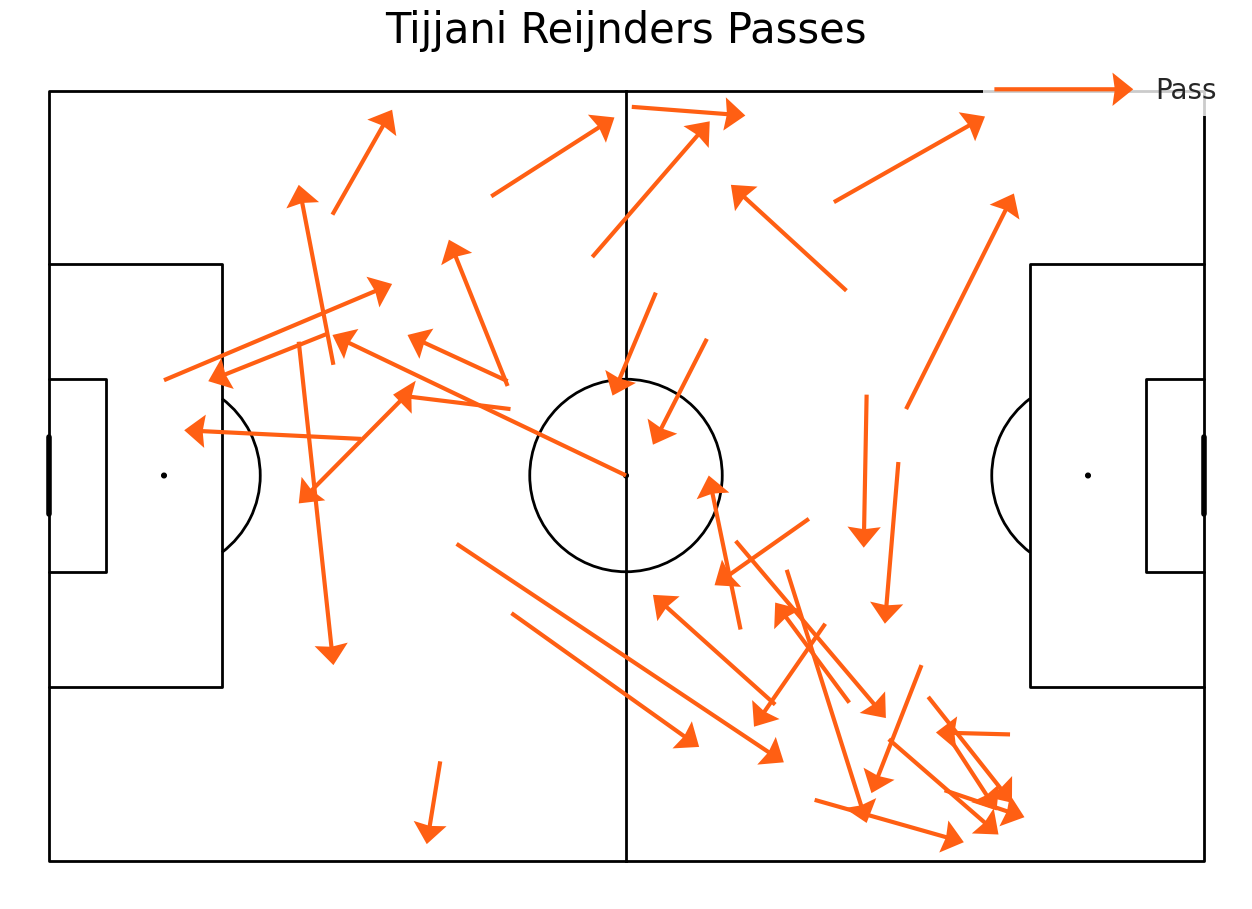

In [236]:
# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# passes
pass_colour='#FF5F13'
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} Passes', fontsize=30,color='black')

# Progressões e passes no último terço


#### Filtrando por passes que começaram foram do último terço e terminaram dentro dele. Passes que foram completados

In [237]:
f3rd_passes=match_events[(match_events.team==team)&(match_events.type=="Pass")&(match_events.x<80)&(match_events.pass_end_x>80)&(match_events.pass_outcome.isna())]

f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [238]:
f3rd_passes_count

,player,Passes
0,Jerdy Schouten,3
1,Joey Veerman,5
2,Joshua Zirkzee,1
3,Nathan Aké,1
4,Stefan de Vrij,5
5,Tijjani Reijnders,3
6,Virgil van Dijk,1
7,Xavi Simons,2


#### Agora, as conduções de bola que começaram fora e terminaram dentro do último terço

In [239]:
f3rd_carries=match_events[(match_events.type=="Carry")&(match_events.x<80)&(match_events.carry_end_x>80)&(match_events.team==team)]

f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [240]:
# Passes e conduções no mesmo dataframe
df_passes_carries = pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])
# Preenchendo os valores nulos com 0
df_passes_carries = df_passes_carries.fillna(0)

# Criando uma coluna com a soma dos passes e conduções
df_passes_carries['Total'] = df_passes_carries['Passes'] + df_passes_carries['Carries']


df_passes_carries.sort_values(by='Total', ascending=False, inplace=True)

df_passes_carries

,player,Passes,Carries,Total
9,Xavi Simons,2.0,5.0,7.0
2,Joey Veerman,5.0,2.0,7.0
6,Stefan de Vrij,5.0,1.0,6.0
7,Tijjani Reijnders,3.0,3.0,6.0
1,Jerdy Schouten,3.0,0.0,3.0
0,Cody Mathès Gakpo,0.0,2.0,2.0
5,Nathan Aké,1.0,0.0,1.0
4,Memphis Depay,0.0,1.0,1.0
3,Joshua Zirkzee,1.0,0.0,1.0
8,Virgil van Dijk,1.0,0.0,1.0


### Gráfico de barras

<Figure size 1500x1500 with 0 Axes>

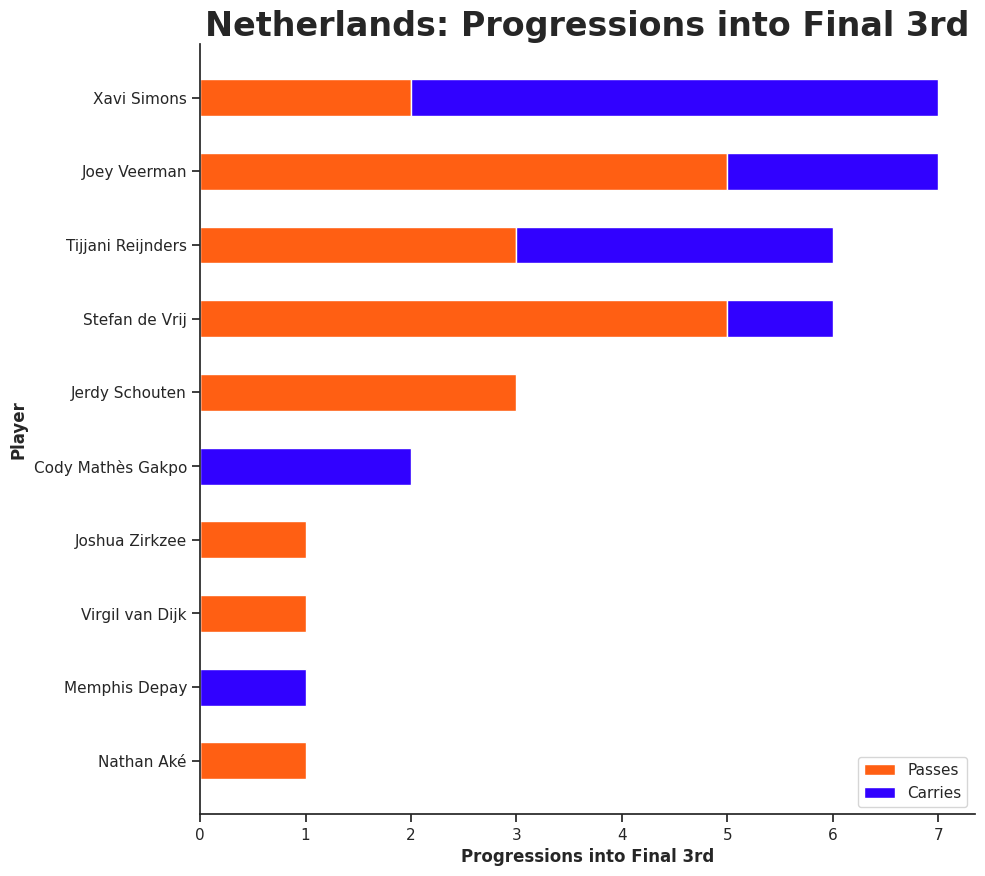

In [241]:
pass_colour='#FF5F13'
carry_colour='#3101FF'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
df_passes_carries.sort_values(by='Total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=df_passes_carries[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

### Campo

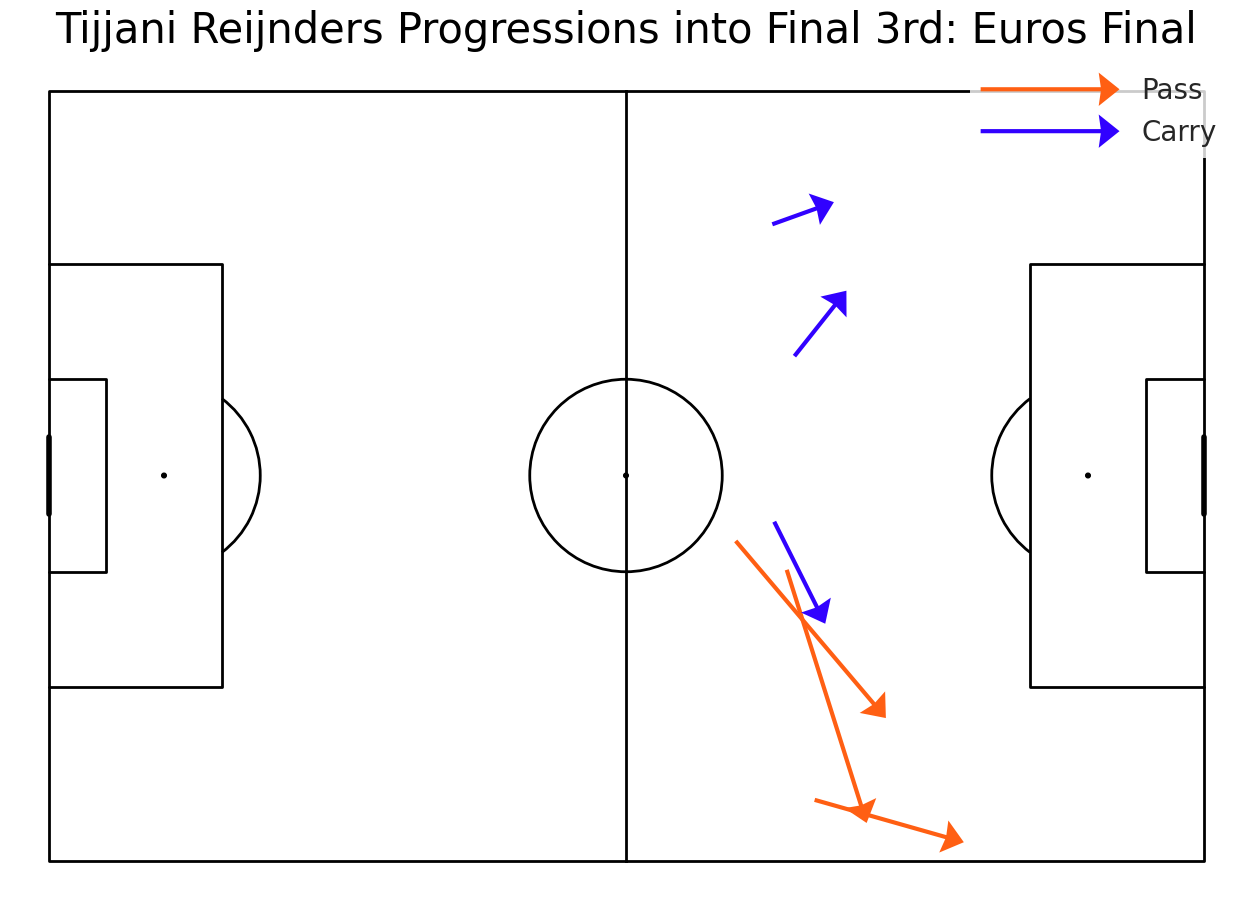

In [242]:

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

# conducoes
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")


ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')